# PATIENT FALL RISK ASSESSMENT PROJECT

herrerer

## Background


The clinic's director seeks to improve patient safety and reduce fall-related incidents. Falls among patients pose a significant risk, leading to severe health complications and increased healthcare costs. To address this issue, a data-driven assessment is required to better understand the factors contributing to falls and to develop predictive measures for mitigating them effectively.

The dataset used for this analysis consists of patient-related information, categorized into two types:

 - Medical Data: Collected upon patient admission and during patient stay, this dataset includes age, gender, diagnosis, and procedure. This data is always available for every patient.

 - Nursing Data: The remaining variables in this dataset come from the so-called fall risk assessment. This assessment is conducted by nurses and contains various risk factors that are assumed to contribute to patient falls. Unlike medical data, nursing data is manually recorded and is only collected for specific patients—namely, those deemed at an increased risk of falling or those who exceed a certain age threshold. From these variables also the variable fall risk is derived, that is the traditional nursing assessment of a patient’s fall risk.

Our task is to conduct a predictive analytics project with two main objectives:

1) Develop a reliable assessment of the risk of patient falls based on historical data.

2) Identify key factors that contribute to fall incidents.

## Section 1: Data Overview and Preparation

In this section, we:
 - Provide a clear and intuitive summary of the dataset.

 - Define an approach to identify outliers and implement an appropriate method to handle them.

 - Identify and assess missing data. Define an approach to handle the missing data.

 - Establish an appropriate strategy for partitioning training and testing datasets


### Import Necessary Libraries

In [85]:
# Installations (only need to run once)

# %pip install autoviz
# %pip install miceforest
# %pip install prince
# %pip install gower
# %pip install shap
# %pip install imblearn

In [86]:
import pandas as pd
# %pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import (
     accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
 )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
     precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, auc
 )

import xgboost as xgb
import shap
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import prince
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier, Pool

In [87]:
pd.set_option('display.max_rows', 200)

### 1.1 SUMMARY OF THE DATASET

In [88]:
pwd()

'/Users/fyudris/GitRepo/workspace_AppliedAnalyticsPortfolio'

In [89]:
# Load the dataset
path = "data/kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

# Display the first few rows to understand the structure
df.head()

,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,...,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,decubitus-risk,fall-risk,diseases,sex
0,False,179020,39,0,S250,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,False,female
1,False,112009,29,0,M418,False,False,NaN,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,male
2,False,54403,29,9-26,S910,False,NaN,False,NaN,NaN,...,False,False,False,False,False,NaN,NaN,0,NaN,female
3,False,13054,64,8-77,M400,True,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,0,0,False,male
4,False,45770,89,8-93,K630,False,NaN,False,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,male


#### Shape and Data Types

In [90]:
print("Number of rows and columns:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nColumn Names:\n", df.columns.tolist())

Number of rows and columns: (40000, 45)

Data Types:
 object     23
bool       19
int64       2
float64     1
Name: count, dtype: int64

Column Names:
 ['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1', 'decubitus-admission', 'decubitus-at_the_moment', 'bed_mobility-impairment', 'bed_mobility-jones', 'bed_mobility-skin_condition', 'transfer-impairment', 'transfer', 'medical_items', 'medical_items-arm_or_leg_splint', 'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'medical_items-skin_condition_at_item_application', 'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay', 'fall-while_transfer', 'walk-impairment', 'walk-jones', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-impairment', 'excretions-incontinence', 'excretions-nykturie', 'cognition-impairment', 'cognition-disorie

In [91]:
# Overview of all variable names and their data types
print("\nVariable names and their data types:")
print(df.dtypes)  # Displays column names with their data types


Variable names and their data types:
fallen                                                 bool
id                                                    int64
age                                                   int64
procedure                                            object
diagnosis                                            object
c_zriserh1                                             bool
decubitus-admission                                  object
decubitus-at_the_moment                              object
bed_mobility-impairment                              object
bed_mobility-jones                                   object
bed_mobility-skin_condition                          object
transfer-impairment                                  object
transfer                                             object
medical_items                                        object
medical_items-arm_or_leg_splint                        bool
medical_items-A_V_system                               bool
me

In [92]:
# Counts the unique values in each column of the DataFrame `df`.

# This step helps in understanding the variability and distribution of data within each column.
# It is particularly useful for identifying categorical variables, columns with low variance,
# and potential issues such as columns with a single unique value or unexpected data types.

unique_counts = df.nunique()
print(unique_counts)

fallen                                                  2
id                                                  38226
age                                                    84
procedure                                             209
diagnosis                                            3345
c_zriserh1                                              2
decubitus-admission                                     1
decubitus-at_the_moment                                 2
bed_mobility-impairment                                 2
bed_mobility-jones                                      5
bed_mobility-skin_condition                             2
transfer-impairment                                     2
transfer                                                5
medical_items                                           2
medical_items-arm_or_leg_splint                         2
medical_items-A_V_system                                1
medical_items-plaster_or_neck_brace                     2
medical_items-

##### Observations: Columns with Low Variance
- Some columns, such as `medical_items-A_V_system` and `decubitus-admission`, lack variance and hold no predictive power. These columns are dropped in subsequent steps.
- The variable `c_zriserh1` is undocumented and is also removed from the dataset.

In [93]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [94]:
df["medical_items-A_V_system"].value_counts()

medical_items-A_V_system
False    40000
Name: count, dtype: int64

##### Actions Taken
- Dropped columns with no predictive power: `medical_items-A_V_system`, `decubitus-admission`, and `c_zriserh1`.
- Inspected the distribution of unique values and data types to guide preprocessing and feature engineering.

In [95]:
df = df.drop(["medical_items-A_V_system", "decubitus-admission", "c_zriserh1"], axis=1)

### 1.2 OUTLIER DETECTIONS

#### Distribution of the Target Variable `fallen`

The target variable `fallen` represents whether a patient has experienced a fall (1 = Yes, 0 = No). Understanding the distribution of this variable is crucial for assessing class imbalance, which can significantly impact model performance.

- **Visualization**: A count plot is used to display the distribution of the `fallen` variable. The y-axis is scaled logarithmically to better visualize the counts, especially if there is a significant class imbalance.
- **Annotations**: Each bar in the plot is annotated with its respective count for clarity.

The code below generates the visualization:

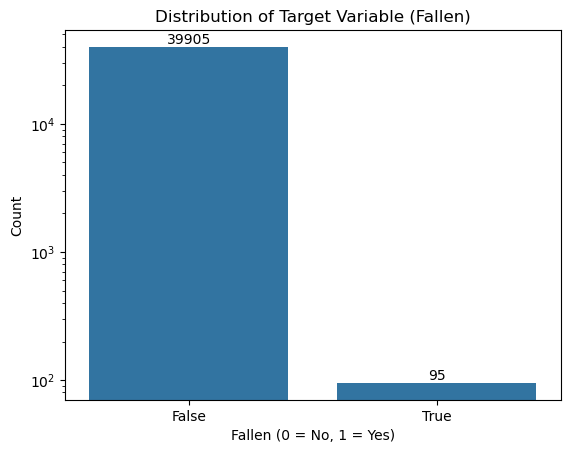

In [96]:
sns.countplot(data=df, x='fallen')
plt.title('Distribution of Target Variable (Fallen)')
plt.xlabel('Fallen (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Annotate the bars with their respective counts
for p in plt.gca().patches:
	count = int(p.get_height())
	plt.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
				 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
				 textcoords='offset points')

plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

In [97]:
print("Value distribution for 'fallen':")
print(df['fallen'].value_counts())
fall_counts = df['fallen'].value_counts(normalize=True) * 100
print("\nPercentage of Fall Incidents:\n", fall_counts.round(2))

Value distribution for 'fallen':
fallen
False    39905
True        95
Name: count, dtype: int64

Percentage of Fall Incidents:
 fallen
False    99.76
True      0.24
Name: proportion, dtype: float64


**Key Observations**:
- The distribution of the `fallen` variable is imbalanced, with significantly more instances of patients who did not fall compared to those who did.
- This imbalance will need to be addressed during model training, possibly through techniques such as oversampling, undersampling, or using class-weighted algorithms.

#### CHECK MISSING VALUES

In [98]:
# Calculate missing values and percentages for all columns
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

# Create a DataFrame for the summary
missing_summary = pd.DataFrame({
	'Missing Values': missing,
	'Percentage': missing_percentage.round(2)
}).sort_values(by='Percentage', ascending=False)

# Display the summary
print("\nMissing Values per Column:\n", missing_summary)


Missing Values per Column:
                                                   Missing Values  Percentage
medical_items-skin_condition_at_item_application           38637       96.59
fall-how_many_last_12_month                                38600       96.50
bed_mobility-skin_condition                                38447       96.12
bed_mobility-jones                                         37593       93.98
fall-while_stay                                            37212       93.03
transfer                                                   36994       92.48
walk-jones                                                 35627       89.07
decubitus-at_the_moment                                    30401       76.00
psychotropic_or_sedatives_drugs                            30203       75.51
cognition-impairment                                       29957       74.89
diseases                                                   29956       74.89
excretions-impairment                          

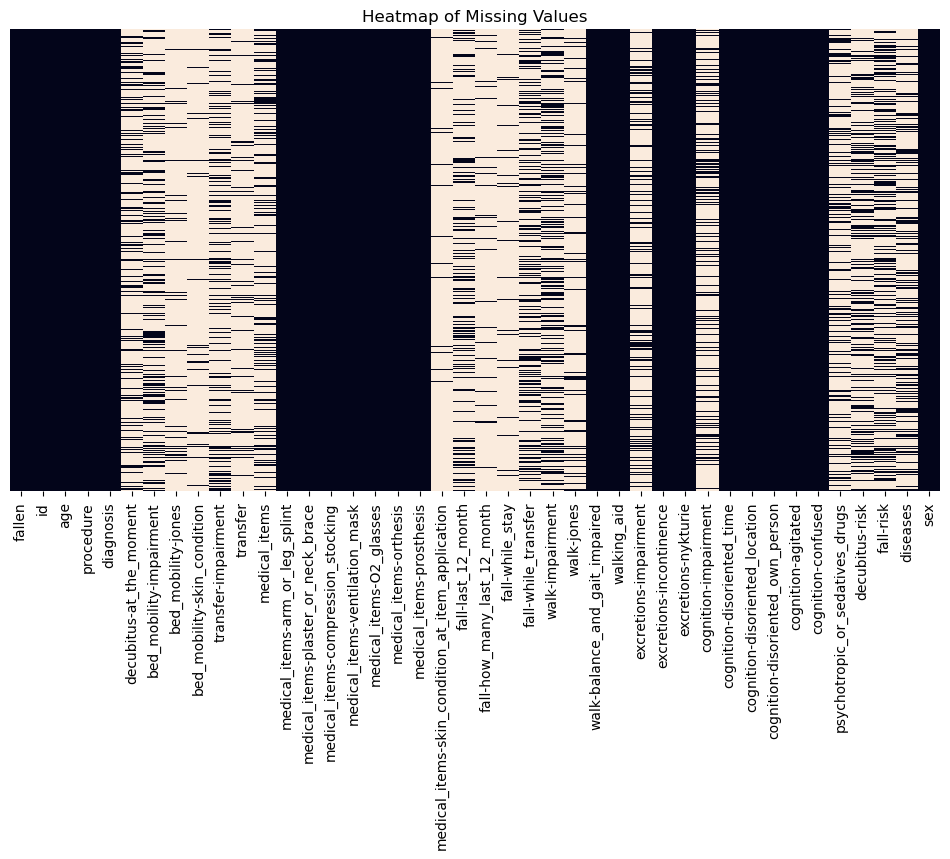

In [99]:
# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

We see here that the missing data does not follow any obvious patterns. This is going to us makeing decisions later on how to impute those missing data.

### Handling missing data

From the provided explanations, we have the following columns to consider:
  - Columns with 0 missing values (fully recorded).
  - Logical columns with high missingness => means "not assessed" or "unknown".
  - Jones score columns, 'decubitus-risk' and 'fall-risk' (character) with values {0, +, ++} that hold ordinal values

#### Logical Columns with missing data

### Categorize Boolean Variable & Handle Missing Data

Upon examination, some features are recognized automatically as `object`.
We did further inspection to determine if the data types are properly assigned.
We determined the features that should be encoded as `bool` and convert them accoringly.

In [100]:
bool_vars = [
    "decubitus-at_the_moment",
    "bed_mobility-impairment",
    "bed_mobility-skin_condition",
    "transfer-impairment",
    "medical_items",
    "medical_items-skin_condition_at_item_application",
    "fall-last_12_month",
    "fall-while_stay",
    "fall-while_transfer",
    "walk-impairment",
    "excretions-impairment",
    "cognition-impairment",
    "psychotropic_or_sedatives_drugs",
    "diseases"
]

df[bool_vars] = df[bool_vars].astype("boolean")

In [ ]:
# List of boolean/categorical columns that need NaN imputation and dummy encoding
columns_to_encode = [
    "fall-while_stay", "transfer-impairment", "bed_mobility-impairment",
    "excretions-impairment", "cognition-impairment", "walk-impairment",
    "fall-while_transfer", "fall-last_12_month", "medical_items-skin_condition_at_item_application",
    "medical_items", "bed_mobility-skin_condition", "decubitus-at_the_moment", "psychotropic_or_sedatives_drugs", "diseases", "sex"
]

# Fill NaNs with "Unknown" and convert to categorical type
df[columns_to_encode] = df[columns_to_encode].astype("object").fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)


#### Handle numerical Variables with Missing Data

The only numerical variable with missing data is "fall-how_many_last_12_month". In out final approach, we just left the variable unimputed because it yielded the best result. We show the other imputation strategies we employed:

- imputation with missingness indicator

- imputation with hot-deck 

In [102]:
# Create a missing indicator for "fall-how_many_last_12_month"
df["fall-how_many_last_12_month_missing"] = df["fall-how_many_last_12_month"].isna()

#### Hot Deck Encoding

Lets look at the distribution of the variable to check if hot-deck imputation makes sense.

In [103]:
# plt.hist(df["fall-how_many_last_12_month"], bins=15, edgecolor='black')  # Increase bins for finer granularity
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram of ndarray")
# plt.show()

In [104]:
# # Step 1: Copy the column to a new column
# df['fall_scrambled'] = df['fall-how_many_last_12_month'].copy()

# # Step 2: Remove missing values and randomly shuffle the column
# non_missing_values = df['fall_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# # Step 3: Replicate values so that there are as many as needed
# num_missing = df['fall-how_many_last_12_month'].isna().sum()
# replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# # Step 4: Join the scrambled column with the original DataFrame
# df.loc[df['fall-how_many_last_12_month'].isna(), 'fall-how_many_last_12_month'] = replicated_values

# # Step 5: Drop the scrambled column (optional)
# df.drop(columns=['fall_scrambled'], inplace=True)

# # Check if missing values are imputed
# print(df['fall-how_many_last_12_month'].isna().sum())  # Should be 0 if all NaNs were filled

In [105]:
# plt.hist(df["fall-risk"], bins=15, edgecolor='black')  # Increase bins for finer granularity
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram of ndarray")
# plt.show()

As we can see the hot deck-imputation worked.

Both the imputation strategies were tested using the evaluation pipeline further down below but did not lead to an improvement. Since the final model can handle missing data it is left unimputed.

#### Ordinal Variables

The variables down below can be imputed with an OrdinalEncoder or with one-hot encoding.

In [106]:
# df["transfer"] = OrdinalEncoder().fit_transform(df[["transfer"]])
# df["bed_mobility-jones"] = OrdinalEncoder().fit_transform(df[["bed_mobility-jones"]])
# df["decubitus-risk"] = OrdinalEncoder().fit_transform(df[["decubitus-risk"]])
# df["fall-risk"] = OrdinalEncoder().fit_transform(df[["fall-risk"]])
# df["walk-jones"] = OrdinalEncoder().fit_transform(df[["walk-jones"]])

Again both approaches were tested and we decided for the one-hot encoding since this approach yielded better results.

The reason for this is obvious by looking at some crosstabs.

In [107]:
ct = pd.crosstab(df['fall-risk'], df['fallen'])
print(ct)

fallen     False  True 
fall-risk              
+           3590     95
++           197      0
0           8446      0


In [108]:
ct = pd.crosstab(df['walk-jones'], df['fallen'])
print(ct)

fallen      False  True 
walk-jones              
1             454     31
2            3082      3
3             475     12
4A            233     10
4B             70      3


It is obvious from these crosstabs that the variables are actually not ordinal, i.e. a classification with higher jones score/risk profile does not lead to more falls!

One-hot encoding for the supposedly ordinal variables

In [109]:
columns_to_encode = ["transfer", "bed_mobility-jones", "walk-jones", "decubitus-risk", "fall-risk"]

# Fill NaNs with "Unknown"
df[columns_to_encode] = df[columns_to_encode].fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [110]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,112009,29,0,M418,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


### Handle Procedure and Diagnosis Columns

Quick note on those columns: We have spent some time thinking about how to handle those. It seems unsuitable to try to completely one-hot encode them since this will yield to an extremely dataset. Even dimensionality reduction techniques won`t help them. We therefore decided to bin both the columns. This makes sense since both the ICD-10 and OPS codes give their broad catgegory by their first digit or their first letter. The rest of the digits give more detailed information that is unlikely to carry meaningful information on its own. It is therefore better to just look at the broader categories. For example ICD-10 code 6 gives infromation on whether the patient received medication, a very interesting column to look at.

In [111]:
df["procedure_category"] = df["procedure"].apply(lambda x: x if x == "0" else x.split("-")[0])
df_dummies = pd.get_dummies(df["procedure_category"], prefix="procedure_category")
# # Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [112]:
# Extract the first letter (ICD-10 chapter)
df["ICD10_category"] = df["diagnosis"].str[0]
# One-hot encode the categories
df_dummies = pd.get_dummies(df["ICD10_category"], prefix="ICD10")
# Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [113]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_Q,ICD10_R,ICD10_S,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,112009,29,0,M418,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Notes: 
- Ranking the probability of patient's fall (e.g. high risk, etc.) might be enough instead of assigning individual patient's fall/non-fall value.
- Missing nursing data is not MCAR -> dummy variables for unknown values might be a good predictors

## Outlier detection

In [114]:
numerical_vars = ["age", "fall-how_many_last_12_month"]

In [115]:
def tukey_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Example for all numerical vars:
outlier_flags_tukey = pd.DataFrame()
for col in numerical_vars:
    outlier_flags_tukey[col] = tukey_outliers(df[col])

# Summary
print("Tukey Outliers Count:")
print(outlier_flags_tukey.sum().sort_values(ascending=False))

Tukey Outliers Count:
fall-how_many_last_12_month    278
age                              0
dtype: int64


In [116]:
df["fall-how_many_last_12_month"].value_counts()

fall-how_many_last_12_month
1.000000    1122
5.000000     249
3.000000      11
2.000000       3
3.392226       1
2.748724       1
4.931584       1
3.100813       1
3.871862       1
3.659762       1
2.981188       1
1.257659       1
3.241220       1
4.396037       1
4.096168       1
2.013521       1
2.202339       1
4.453497       1
4.175363       1
Name: count, dtype: int64

Even though Tukey fence did identify outliers for "fall-how_many_last_12_month" after manual inspection shows that all the values in reality are realistic. The reason is simply that exactly one fall already entails so many isntances that every other value is deemed an outlier.

### Partitioning

We decided to split the data is training/test/validation. We wont test the validation dataset until the very end since we are always evaluating and tuning based on the test set.

In [117]:
# Split into train (80%) and test (20%)
df, val_df = train_test_split(df, test_size=0.1, stratify=df["fallen"], random_state=42)

# Section 2: Data Exploration and Relationships

We are going to compute the numerical variables with pearson correlation.

In [118]:
df['age'].corr(df['fallen'], method='pearson')

0.06165066620933579

In [119]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

0.21530210766180033

#### Binary Variables will be computed with Phi-Coefficient correlation

In [120]:
def phi_coefficient(df, var, target="fallen"):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = df.shape[0]
    return np.sqrt(chi2 / n)

binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary columns
phi_corrs = {var: phi_coefficient(df, var) for var in binary_vars}

# Sort by absolute correlation value
sorted_phi_corrs = sorted(phi_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

In [121]:
print(sorted_phi_corrs[:20])

[('fallen', 0.9941721243642759), ('fall-while_stay_True', 0.2634207297731874), ('walk-balance_and_gait_impaired', 0.25508629573547126), ('excretions-incontinence', 0.16657173589736549), ('walk-impairment_True', 0.16403105082306563), ('fall-while_transfer_True', 0.16000152185274139), ('transfer-impairment_True', 0.15392370855740098), ('fall-risk_+', 0.1528247063196303), ('excretions-impairment_True', 0.14948255943037683), ('walk-jones_1', 0.14407380901396077), ('cognition-impairment_True', 0.13988325724877987), ('bed_mobility-impairment_True', 0.13288755740844155), ('cognition-agitated', 0.11322515242741778), ('fall-last_12_month_True', 0.1068224280522789), ('walking_aid', 0.09615616085690859), ('decubitus-risk_+', 0.09507166412594281), ('cognition-disoriented_time', 0.08118758623510328), ('walk-jones_Unknown', 0.08043428269262108), ('walk-impairment_Unknown', 0.07355083386598443), ('fall-risk_Unknown', 0.07279009629345312)]


### Visualizations

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_46433/1886993880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")


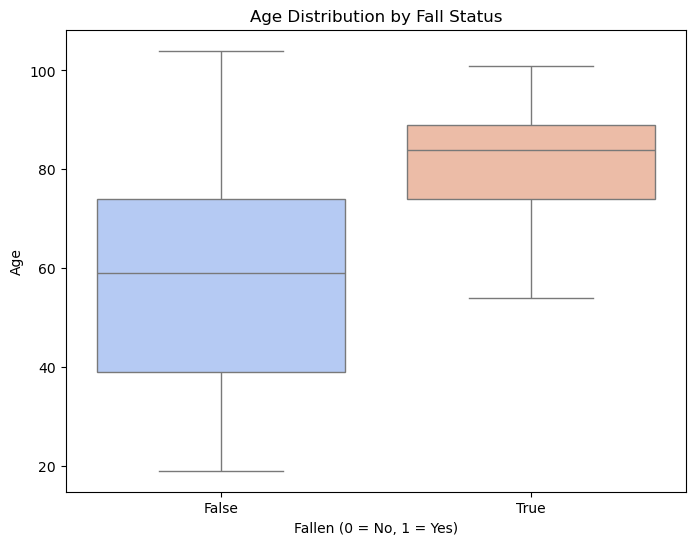

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")
plt.xlabel("Fallen (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Fall Status")
plt.show()


There seems to be a significant of impact of age on fallen.

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_46433/97186582.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()


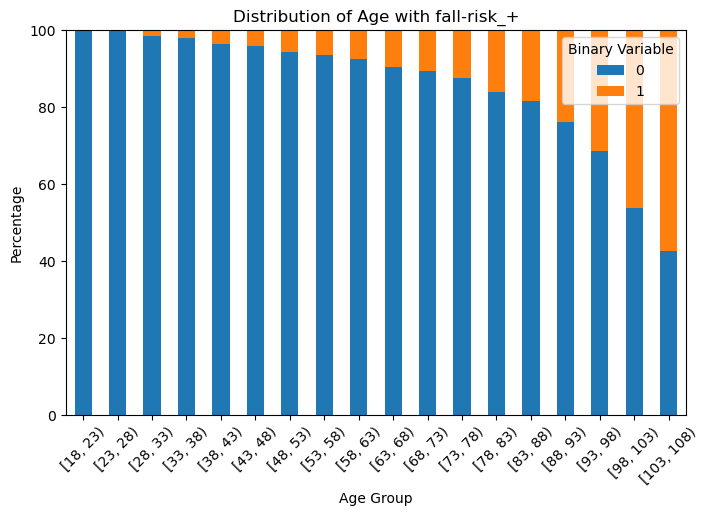

In [123]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with fall-risk_+")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

Age and fall_risk_+ are highly correlated. This is depicted better than by computing a correlation score (which can be tricky between cont. and bin varaibles, especially if skewed).

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_46433/2492159077.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()


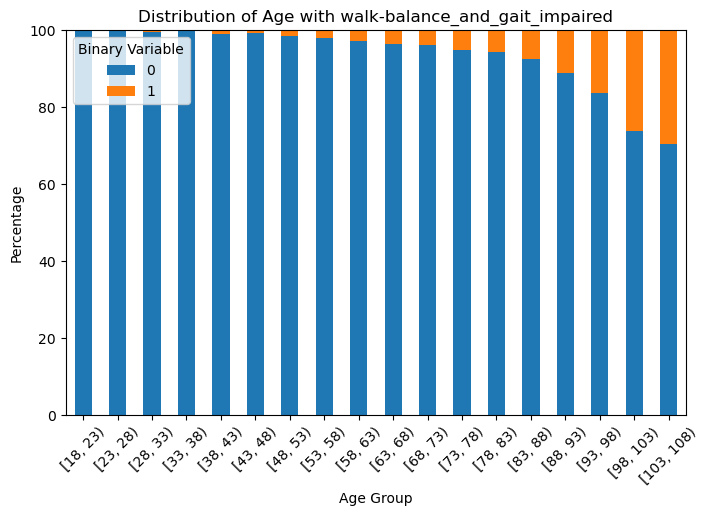

In [124]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with walk-balance_and_gait_impaired")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

Rising Age also is correlated with increasing walk and balance and gait impairment, one of the strongest predictors for patient falls.

Other visualizations will less meaningful variables are left out here.

In [125]:
df_backup = df.copy()

In [126]:
binary_vars.remove("fallen")

In [127]:
print(binary_vars)

['medical_items-arm_or_leg_splint', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-incontinence', 'excretions-nykturie', 'cognition-disoriented_time', 'cognition-disoriented_location', 'cognition-disoriented_own_person', 'cognition-agitated', 'cognition-confused', 'fall-while_stay_False', 'fall-while_stay_True', 'fall-while_stay_Unknown', 'transfer-impairment_False', 'transfer-impairment_True', 'transfer-impairment_Unknown', 'bed_mobility-impairment_False', 'bed_mobility-impairment_True', 'bed_mobility-impairment_Unknown', 'excretions-impairment_False', 'excretions-impairment_True', 'excretions-impairment_Unknown', 'cognition-impairment_False', 'cognition-impairment_True', 'cognition-impairment_Unknown', 'walk-impairment_False', 'walk-impairment_True', 'walk-impairment_Unknown', 'fa

### Feature Engineering Through PCA & MCA

In [128]:
# Subset the dataframe to only binary variables
df_mca = df[binary_vars]

# Perform MCA
mca = prince.MCA(n_components=3, random_state=42)
mca = mca.fit(df_mca)

# Transform data to get the new MCs
df_mcs = mca.transform(df_mca)
df_mcs.columns = ["MC1", "MC2", "MC3"]  # Naming first three MCs

In [129]:
df_mcs

,MC1,MC2,MC3
6690,-0.102536,0.028374,0.095790
35722,-0.090733,0.015647,0.007766
32809,-0.100118,0.039659,0.114347
10660,-0.107061,0.040593,-0.123145
33450,-0.060118,0.000139,-0.108222
...,...,...,...
8241,-0.061935,0.075681,0.092644
33347,-0.117054,0.039548,0.040268
16947,-0.048734,0.022757,-0.011233
7614,-0.070468,0.020919,-0.030002


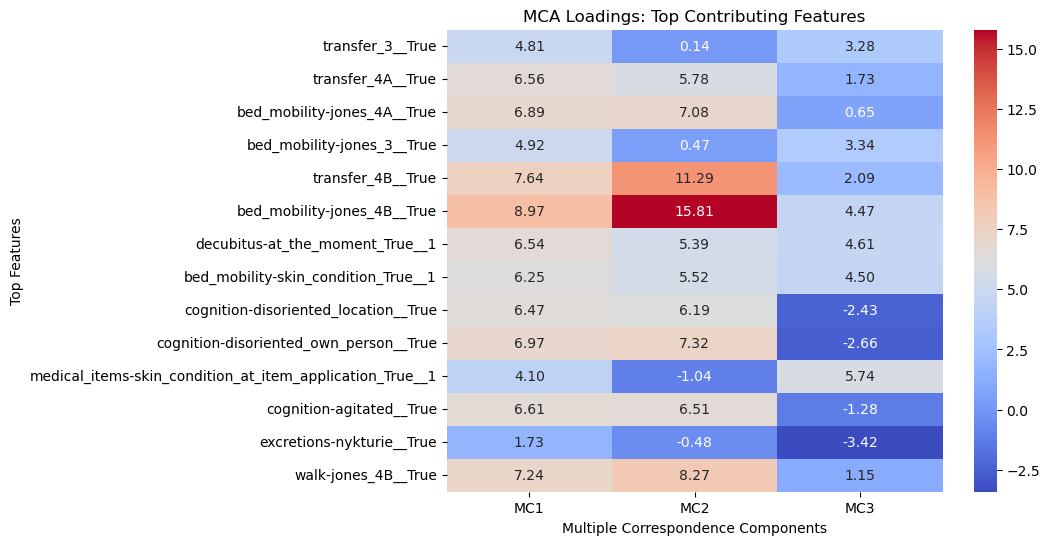

In [130]:
# Get loadings (column coordinates)
loadings = mca.column_coordinates(df_mca)

# Compute absolute values of loadings to measure contribution strength
abs_loadings = loadings.abs()

# Select top 7 features for each of the first three MCs
top_features = set()
for i in range(3):  # Loop over MC1, MC2, MC3
    top_features.update(abs_loadings.iloc[:, i].nlargest(7).index)

# Filter loadings to only include selected top features
loadings_filtered = loadings.loc[list(top_features), :3]
loadings_filtered.columns = ["MC1", "MC2", "MC3"]

# Plot the refined heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_filtered, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("MCA Loadings: Top Contributing Features")
plt.xlabel("Multiple Correspondence Components")
plt.ylabel("Top Features")
plt.show()

All of the MCs are quite different in their loadings. MC2 stands out with very high loadings from bed_mobility_jones with a score of 4B and trensfers with a score of 4B. We are going to include these MCs in predictions later on.

In [131]:
df = pd.concat([df, df_mcs], axis=1)

In [132]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z,MC1,MC2,MC3
6690,False,77363,49,0,G453,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.102536,0.028374,0.095790
35722,False,80749,34,1-10,A010,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.090733,0.015647,0.007766
32809,False,23355,39,0,J110,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.100118,0.039659,0.114347
10660,False,36660,29,0,S100,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.107061,0.040593,-0.123145
33450,False,15012,54,8-92,L210,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.060118,0.000139,-0.108222


# Section 3 Modeling

We are going to employ a Logistic Regression. LogOdds for interpretation.
We are not going to tune the "simple" model and only going to look at the feature importance of the logistic regression.
For the tuned model for performance we are going to use both an AutoML library called "tpot" that we ran several times for hours and scikit-learns forward selection for up to ten variables. The models are going to be tuned for the AUPRC since we care more about ranking potentially endangered patients than about conscise predictions. Also recall is important in order to not miss any potentially endangered patients.

In [133]:
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(df["fall-how_many_last_12_month"].mean())

Recall: 0.15


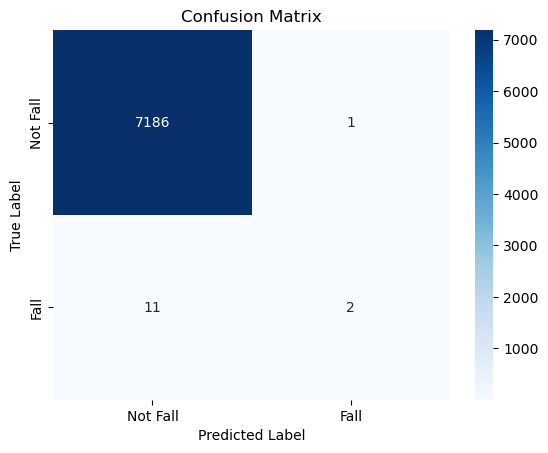

AUPRC: 0.26


In [134]:
# === Load Data ===
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df["fallen"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = recall_score(y_test, y_pred)
print(f"Recall: {accuracy:.2f}")

# === Step 8: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)  # Use y_test instead of y
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
auprc = auc(recall, precision)

print(f"AUPRC: {auprc:.2f}")


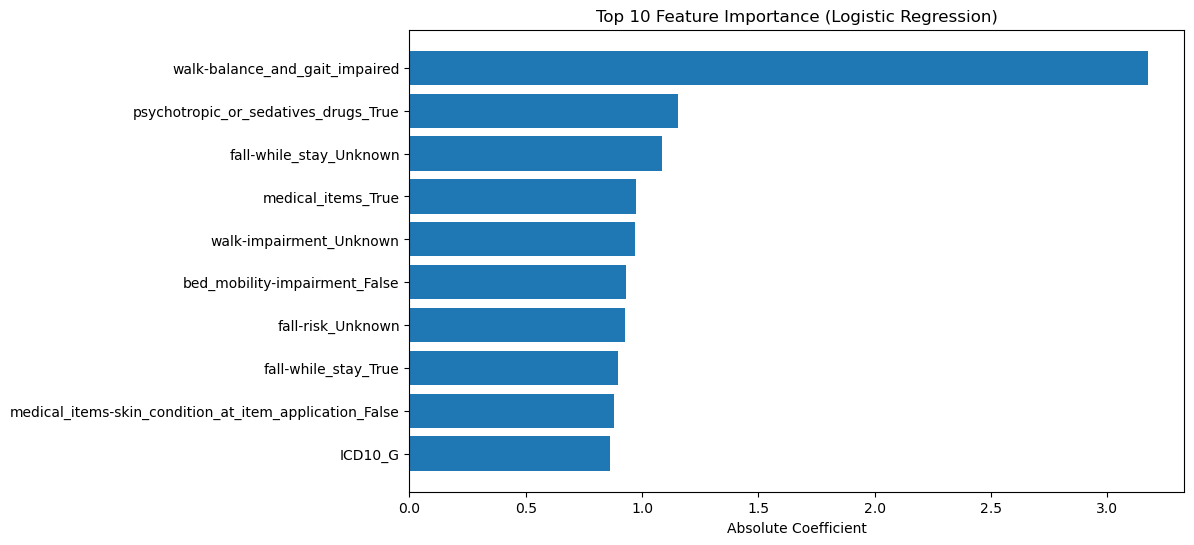

In [135]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display features and their importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort by absolute coefficient value to show most important features in descending order
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importance.head(10)

# Plot the top 10 most important features (largest bars at the top)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Inverts the y-axis to place the largest feature at the top
plt.show()

### More Complex Model

### Random Forest

In [ ]:
def rf_pipeline(df):
    """
    Trains and evaluates a Random Forest model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.

    Returns:
        dict: Model performance metrics.
    """

    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # === Step 1: Hyperparameter Tuning using GridSearchCV ===
    param_grid = {
        'n_estimators': [100, 200],  # Number of trees
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
        'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting
        'random_state': [42]
    }

    # Initialize the RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(rf_model, param_grid, scoring="recall", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_rf_classifier = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation recall: {grid_search.best_score_:.4f}")

    # Train the best model on the full training set
    best_rf_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_rf = best_rf_classifier.predict(X_test)
    print(np.unique(y_pred_rf, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
    print(classification_report(y_test, y_pred_rf))

    # === Step 2: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs_rf = cross_val_predict(best_rf_classifier, X, y, cv=cv, method="predict_proba")[:, 1]

    # === Step 3: Compute AUC-PR ===
    precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y, y_probs_rf)
    auc_pr_rf = auc(recall_rf, precision_rf)

    print(f"AUC-PR Score: {auc_pr_rf:.4f}")

    # === Step 4: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall_rf, precision_rf, marker=".", label=f"AUC-PR = {auc_pr_rf:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve (Random Forest)")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 5: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs_rf, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities (Random Forest)")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 6: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold_rf:.4f}")

    # Apply the best threshold
    y_pred_rf_thresholded = (y_probs_rf >= best_threshold_rf).astype(int)

    # === Step 7: Confusion Matrix ===
    cm_rf = confusion_matrix(y, y_pred_rf_thresholded)
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Random Forest Confusion Matrix")
    plt.show()

    # === Step 8: Feature Importance ===
    feature_importances_rf = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_rf_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances_rf.head(10))


In [137]:
#rf_pipeline(df)

Interpretation:
Achieved AUPRC of 0.23
.
.
.

Note to Fanny:

- we employed three different models. XGBoost, CatBoost, RandomForest
- all results (AUPRC) were similar hwoever feature importance highly different
- we decided to go forward with XGBoost since it was most efficient and forward selection/autml(tpot) is very runtime heavy
- the final XGBoost model with 10 features from forward selection was most sucessful, likely beacuase the dimesnionality was highly reduced (Curse of Dimesnionality)

### CatBoost

In [145]:

def cat_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Define categorical features
    all_features = set(X.columns)  # Convert to set for set operations
    non_cat_features = {"age", "fall-how_many_last_12_month"}  # Define explicitly
    cat_features = list(all_features.difference(non_cat_features))  # Ensure correct conversion

    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    # Train a CatBoost model
    model = CatBoostClassifier(verbose=False)


    param_grid = {
        'iterations': [100, 200],
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(model, param_grid, scoring="recall", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_classifier = grid_search.best_estimator_

    # # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation recall: {grid_search.best_score_:.4f}")



    # # Train a model with the best parameters
    best_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_best_classifier = best_classifier.predict(X_test)
    print(np.unique(y_pred_best_classifier, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_best_classifier):.4f}")
    print(classification_report(y_test, y_pred_best_classifier))


    # # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_classifier, X, y, cv=cv, method="predict_proba")[:, 1]



    # # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)

    print(f"AUC-PR Score: {auc_pr:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(30))

     # # Compute SHAP values
    explainer = shap.TreeExplainer(best_classifier)
    shap_values = explainer(X_train)

    shap.plots.waterfall(shap_values[0])

    shap.plots.bar(shap_values)

    shap.plots.beeswarm(shap_values)



In [146]:
cat_pipeline(df)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=122]=-0.090037833547389 : cat_features must be integer or string, real number values and NaN values should be converted to string.

Interpretation:
Achieved AUPRC of 0.21 worse than the decision tree.
Interpretation of the SHAP-Values

### XGBoost Model

In [ ]:

def xgb_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    # === Load Data ===
    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    # Use stratified sampling to ensure balanced class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


    # === Step 1: Define Model & Parameter Grid ===
    model = xgb.XGBClassifier()

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(model, param_grid, scoring="recall", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_classifier = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation recall: {grid_search.best_score_:.4f}")



    # Train a model with the best parameters
    best_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_best_classifier = best_classifier.predict(X_test)
    print(np.unique(y_pred_best_classifier, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_best_classifier):.4f}")
    print(classification_report(y_test, y_pred_best_classifier))


    # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_classifier, X, y, cv=cv, method="predict_proba")[:, 1]



    # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)
    roc_auc = roc_auc_score(y, y_probs)

    print(f"AUC-PR Score: {auc_pr:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(30))

    print("Shap Values for the train set")
    explainer = shap.TreeExplainer(best_classifier)
    shap_values_train = explainer(X_train)

    shap.plots.waterfall(shap_values_train[0])

    shap.plots.bar(shap_values_train)
    shap.summary_plot(shap_values_train, X_train, plot_type="bar")

    shap.plots.beeswarm(shap_values_train)

    print("Shap Values for the test set")
    shap_values_test = explainer(X_test)
    shap.plots.waterfall(shap_values_test[0])

    shap.plots.bar(shap_values_test)
    shap.summary_plot(shap_values_test, X_test, plot_type="bar")

    shap.plots.beeswarm(shap_values_test)



Best parameters found:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best cross-validation recall: 0.1154
(array([0, 1]), array([7191,    9], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.2353
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.44      0.24      0.31        17

    accuracy                           1.00      7200
   macro avg       0.72      0.62      0.65      7200
weighted avg       1.00      1.00      1.00      7200

AUC-PR Score: 0.2058
ROC-AUC Score: 0.9906


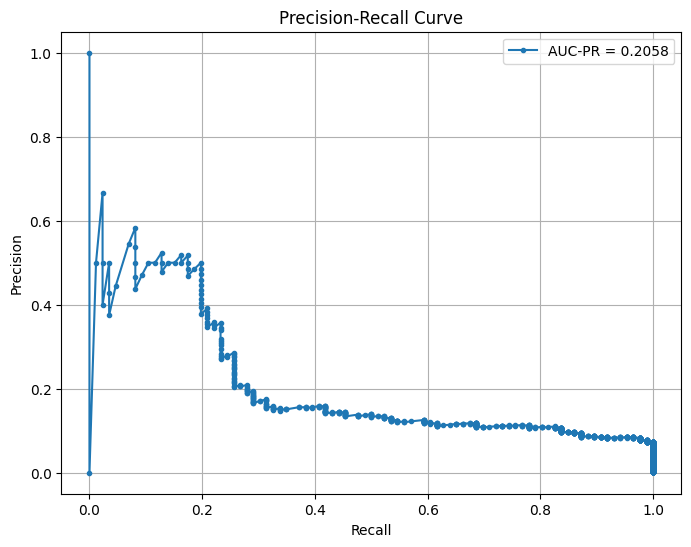

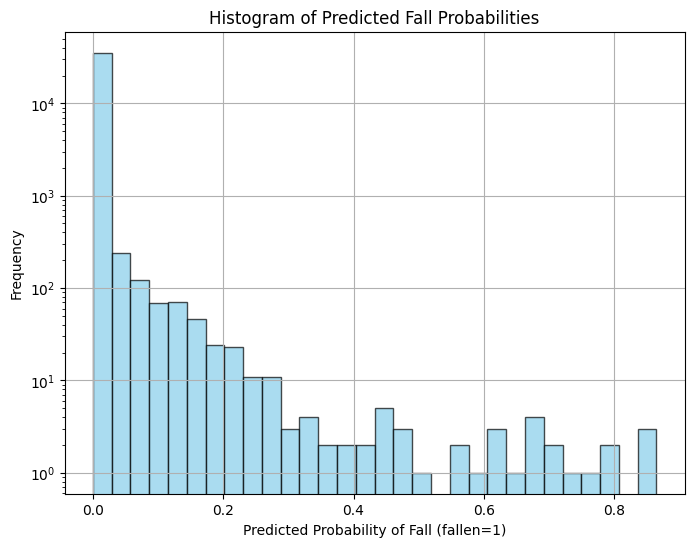

Best Threshold for Precision-Recall Balance: 0.3647


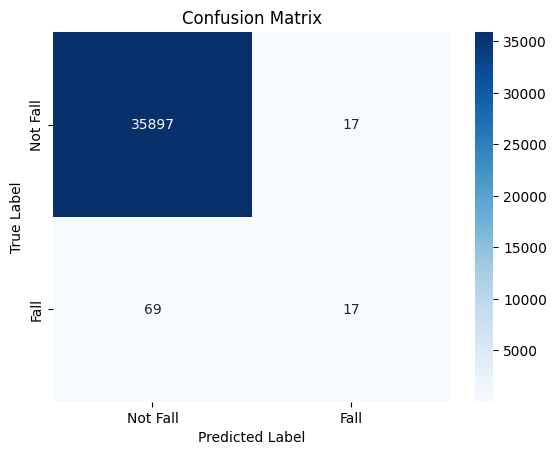

Top 10 Important Features:
                           Feature  Importance
6   walk-balance_and_gait_impaired    0.827039
5                      fall-risk_+    0.064405
8             fall-while_stay_True    0.027628
7          excretions-incontinence    0.012750
11        transfer-impairment_True    0.009198
12   bed_mobility-impairment_False    0.008649
2      excretions-impairment_False    0.008628
9          fall-while_stay_Unknown    0.008353
13    bed_mobility-impairment_True    0.006844
10     transfer-impairment_Unknown    0.006766
3       cognition-impairment_False    0.006068
0                              age    0.005324
4        cognition-impairment_True    0.004340
1       excretions-impairment_True    0.004008
Shap Values for the train set


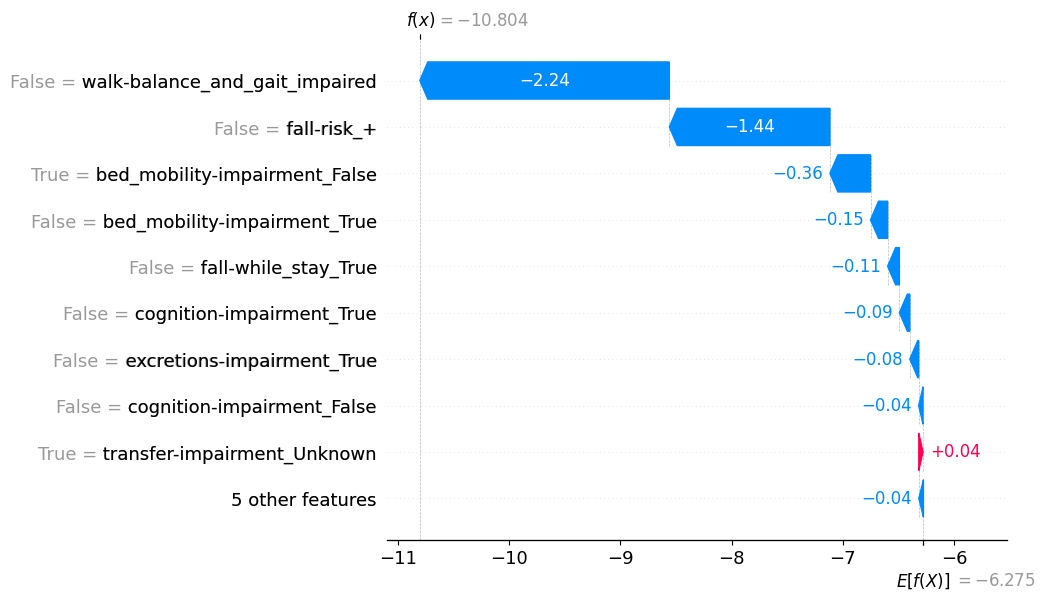

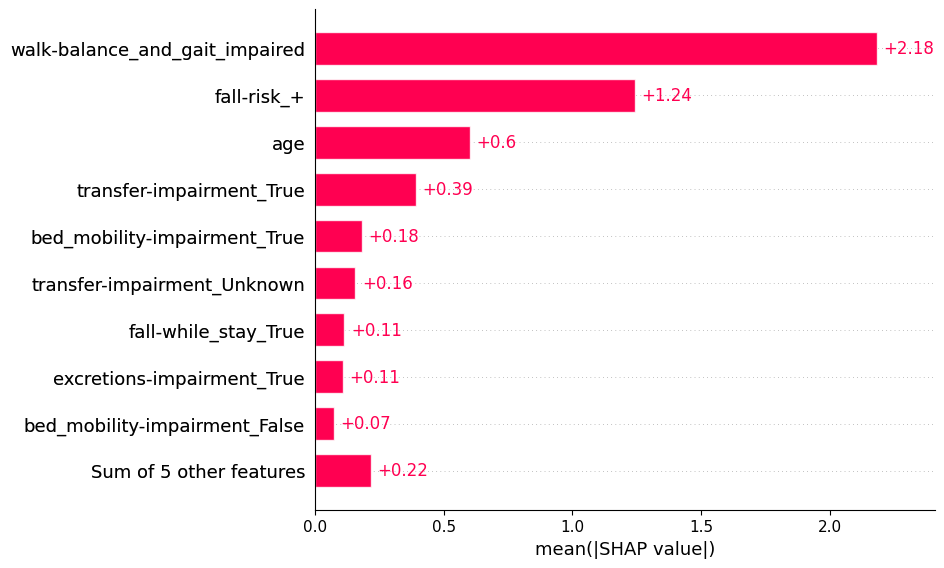

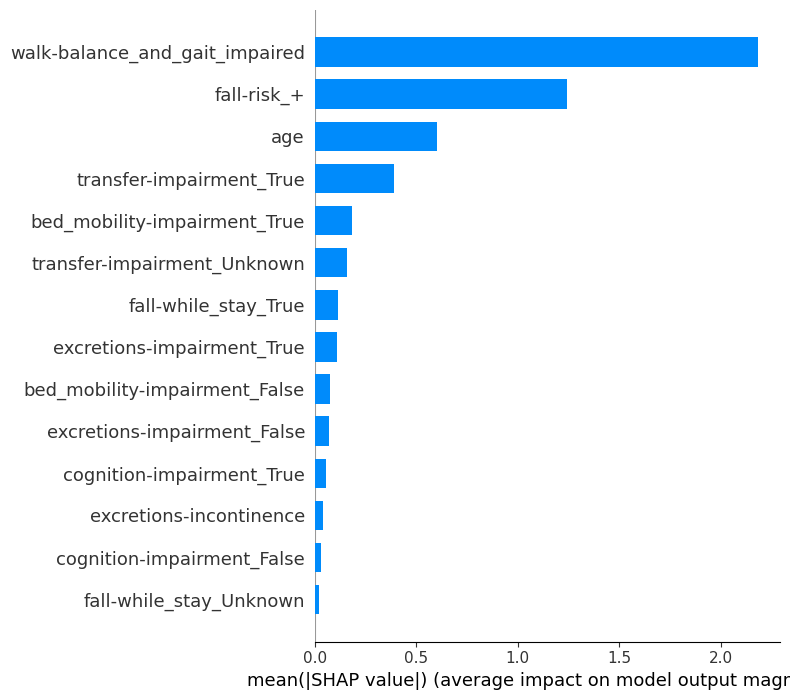

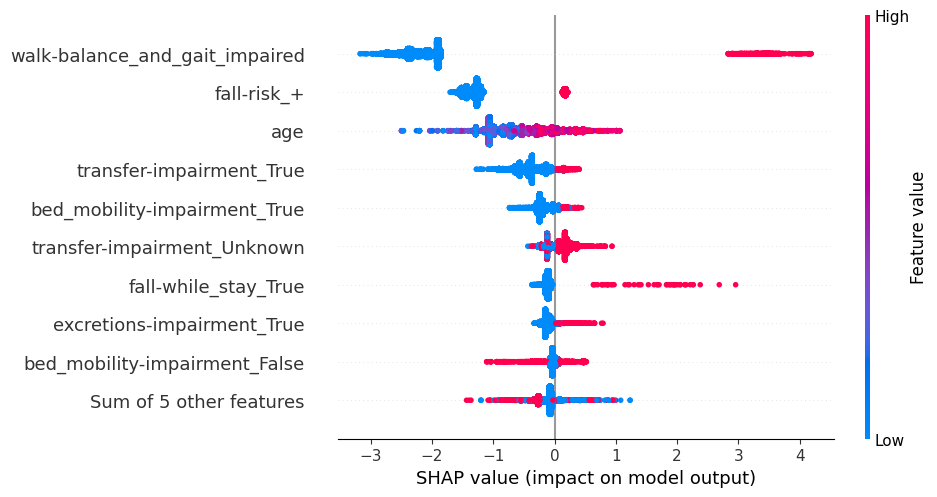

Shap Values for the test set


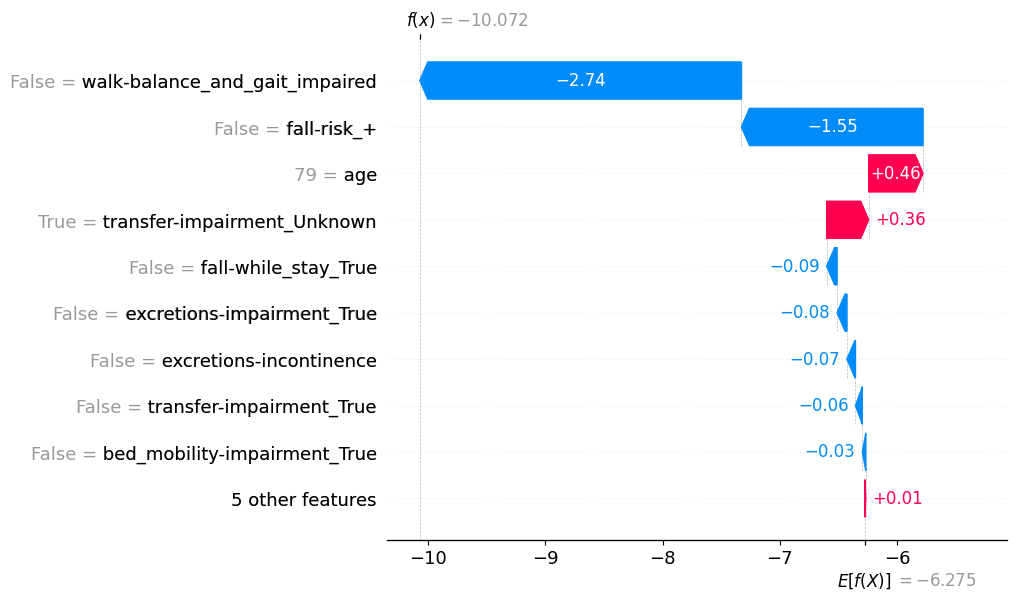

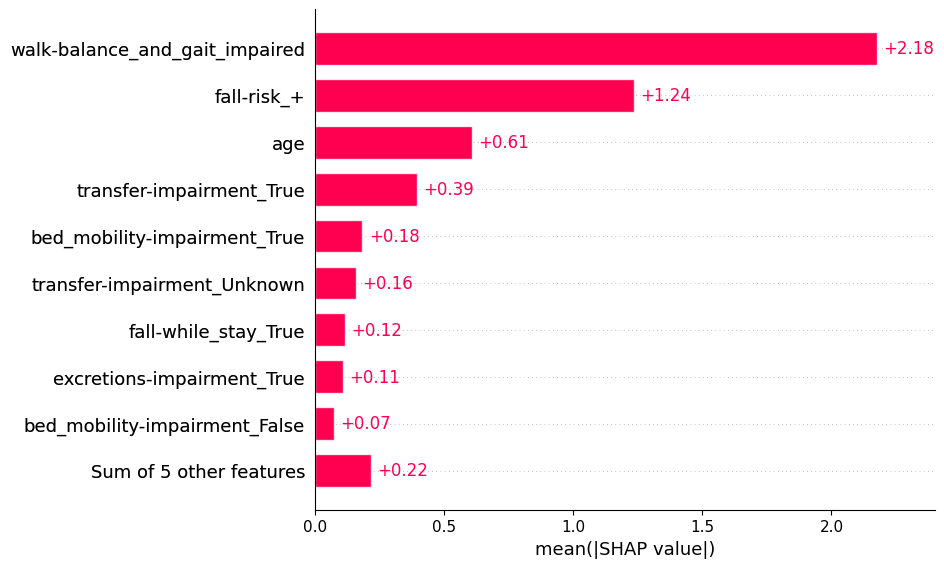

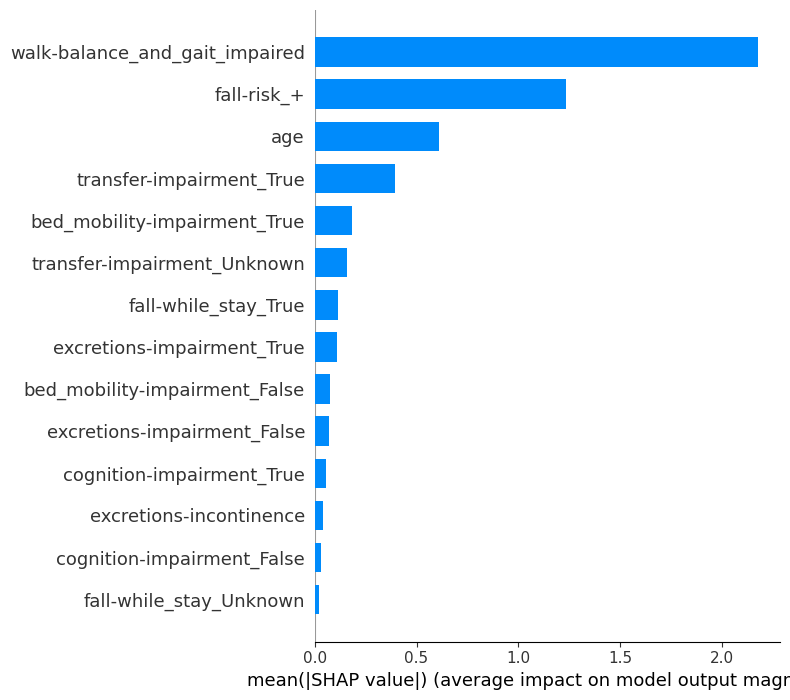

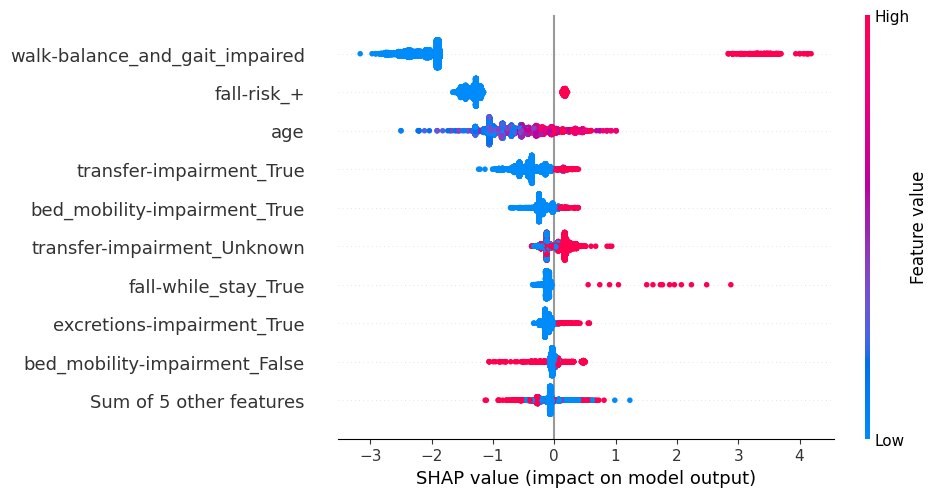

In [ ]:
xgb_pipeline(df)

Intrepretation:
Slightly worse performance than CatBoost but way more efficient

Since in the following tunig process we do not want to use all variables but only a subset we employ a feature selection technique.

We are first employing forward selection. Since this requires an efficient model we use XGBoost for the optimization with automated libraries for feature selection.

### Forward Selection

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import average_precision_score
from sklearn.base import BaseEstimator

 # === Load Data ===
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df["fallen"]  # Target

# Assuming you already have X (features) and y (target)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the SequentialFeatureSelector with forward selection
selector = SequentialFeatureSelector(
    estimator=model,
    n_features_to_select=10,
    direction='forward',  # Forward selection
    scoring='average_precision',  # AUPRC scoring
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # Use all CPUs
)

# Fit the feature selector on the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")


Selected feature indices: [ 11  13  17  25  34  37  66  83  89 104]


In [ ]:
X_train_selected = X_train.iloc[:, selected_features]
X_train_selected

,walk-balance_and_gait_impaired,excretions-incontinence,cognition-disoriented_own_person,transfer_Unknown,walk-jones_3,walk-jones_Unknown,ICD10_M,fall-while_stay_True,bed_mobility-impairment_True,fall-last_12_month_True
32155,False,False,False,True,False,True,False,False,False,False
10279,False,False,False,False,False,True,False,False,False,False
26502,False,False,False,True,False,True,False,False,True,False
25647,False,False,False,True,False,False,False,False,False,False
12167,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6279,False,False,False,True,False,True,False,False,False,False
18903,False,False,False,True,False,True,False,False,False,False
35959,False,False,False,True,False,True,False,False,False,False
32923,False,False,False,True,False,False,False,False,False,False


Interpretation:
Forward Slection is a greedy selection method. The above shown features lead to the greatest imporvement of performance. For the scorer avergae_precision was used which is similar to AUPRC.

### Tpot 

In [ ]:
import tpot
from sklearn.metrics import average_precision_score
auprc_scorer = make_scorer(average_precision_score, average='macro')

y = df["fallen"]
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
est = tpot.TPOTClassifier(scorers=auprc_scorer, max_time_mins=40, verbose=3, warm_start=True)
est.fit(X_train,y_train)


c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57288 instead
  warnings.warn(
Generation: : 0it [32:12, ?it/s]
Generation: : 1it [42:09, 2529.57s/it]

Generation:  1
Best average_precision_score score: 0.08271900451588643



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


TPOTClassifier(max_time_mins=40,
               scorers=make_scorer(average_precision_score, response_method='predict', average=macro),
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x0000016FE7EC5480>,
               verbose=3, warm_start=True)

### LDA

In [ ]:
print(est.fitted_pipeline_)

Pipeline(steps=[('robustscaler',
                 RobustScaler(quantile_range=(0.2688003942657,
                                              0.9472488153471))),
                ('selectfwe', SelectFwe(alpha=0.0072221575128)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('rbfsampler',
                                                                                 RBFSampler(gamma=0.5118605670741,
                                                                                            n_components=80))])),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                             

In [ ]:
# Get model predictions on the test set
y_pred_prob = est.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUPRC
auprc_score = average_precision_score(y_test, y_pred_prob)

print(f"AUPRC Score: {auprc_score}")

AUPRC Score: 0.15554975145220884


Interpretation: Tpot is an AutoML library that handles everything from feature selection to model selection to feature engineering. We ran it several times. However the best model identified by tpot was a LinearDiscriminantAnalysis with several preprocessing steps. This model however achieved a worse performance than the Logistic Regression from part a)!!!

So it is not used further.

Instead the identified 10 most important features identified by forward selection are used again to train the XGBoost model.

In [ ]:

def xgb_m_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    # === Load Data ===
    X = df.drop(columns=["fallen"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    # Use stratified sampling to ensure balanced class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


    # === Step 1: Define Model & Parameter Grid ===
    model = xgb.XGBClassifier()

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(model, param_grid, scoring="recall", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_classifier = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation recall: {grid_search.best_score_:.4f}")



    # Train a model with the best parameters
    best_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_best_classifier = best_classifier.predict(X_test)
    print(np.unique(y_pred_best_classifier, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_best_classifier):.4f}")
    print(classification_report(y_test, y_pred_best_classifier))


    # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_classifier, X, y, cv=cv, method="predict_proba")[:, 1]



    # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)
    roc_auc = roc_auc_score(y, y_probs)

    print(f"AUC-PR Score: {auc_pr:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(30))

    print("Shap Values for the train set")
    explainer = shap.TreeExplainer(best_classifier)
    shap_values_train = explainer(X_train)

    shap.plots.waterfall(shap_values_train[0])

    shap.plots.bar(shap_values_train)
    shap.summary_plot(shap_values_train, X_train, plot_type="bar")

    shap.plots.beeswarm(shap_values_train)

    print("Shap Values for the test set")
    shap_values_test = explainer(X_test)
    shap.plots.waterfall(shap_values_test[0])

    shap.plots.bar(shap_values_test)
    shap.summary_plot(shap_values_test, X_test, plot_type="bar")

    shap.plots.beeswarm(shap_values_test)




Best parameters found:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation recall: 0.1297
(array([0, 1]), array([7198,    2], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.0588
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.50      0.06      0.11        17

    accuracy                           1.00      7200
   macro avg       0.75      0.53      0.55      7200
weighted avg       1.00      1.00      1.00      7200

AUC-PR Score: 0.2850
ROC-AUC Score: 0.9905


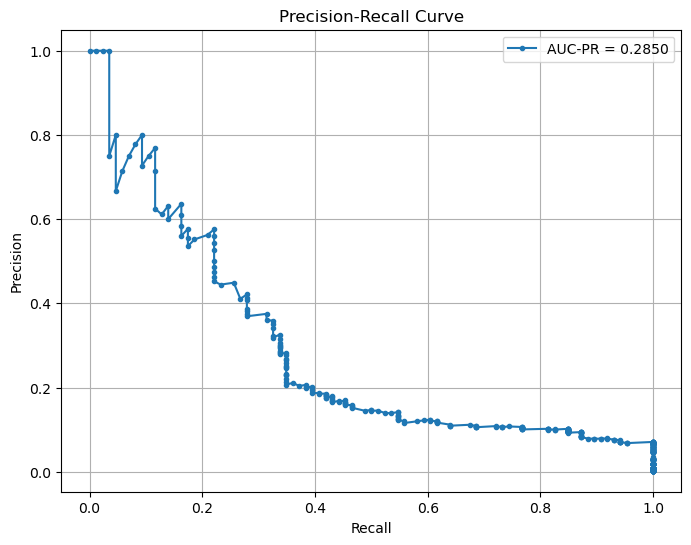

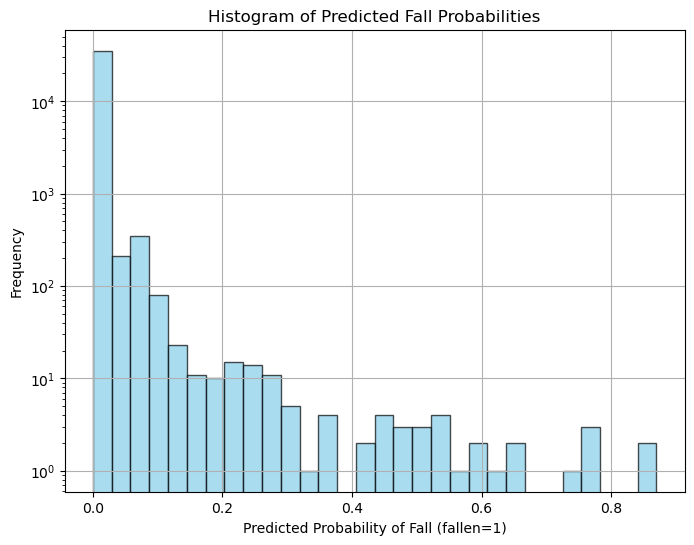

Best Threshold for Precision-Recall Balance: 0.3299


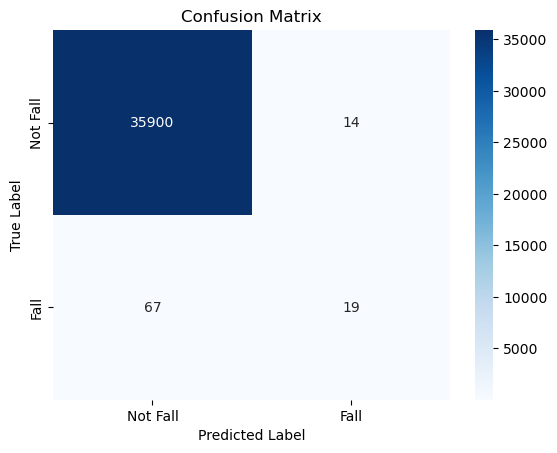

Top 10 Important Features:
                          Feature  Importance
0  walk-balance_and_gait_impaired    0.686759
6            fall-while_stay_True    0.152855
7    bed_mobility-impairment_True    0.033297
1         excretions-incontinence    0.030643
8         fall-last_12_month_True    0.030459
2                transfer_Unknown    0.026075
5                         ICD10_M    0.018895
4              walk-jones_Unknown    0.016478
3                    walk-jones_3    0.004539
Shap Values for the train set


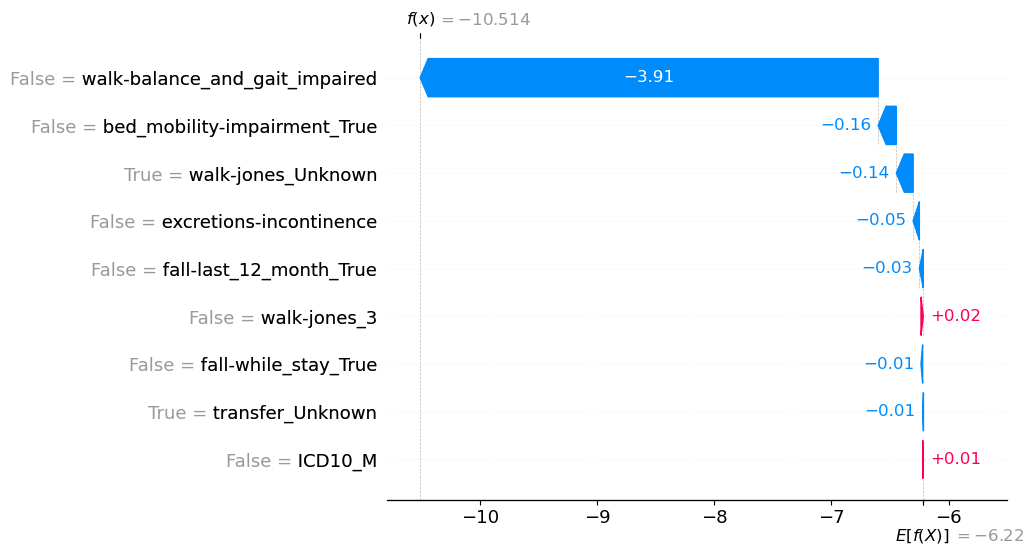

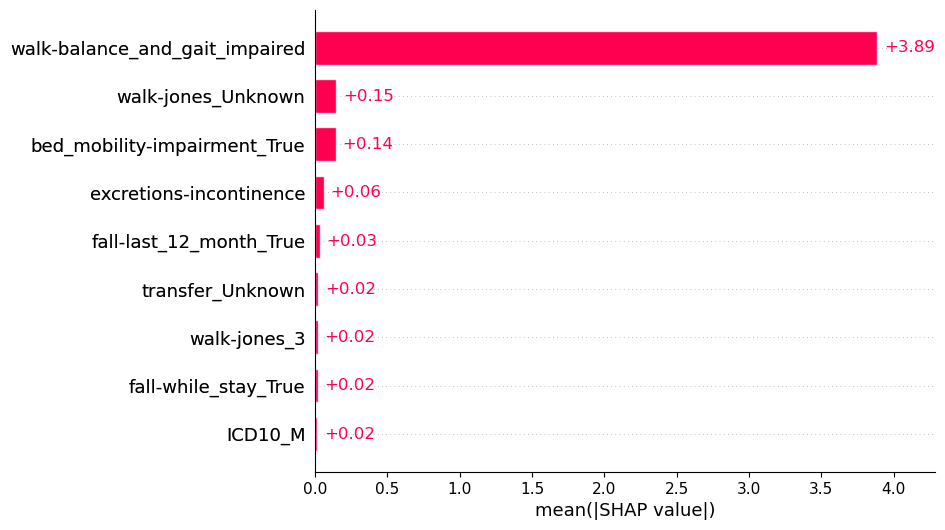

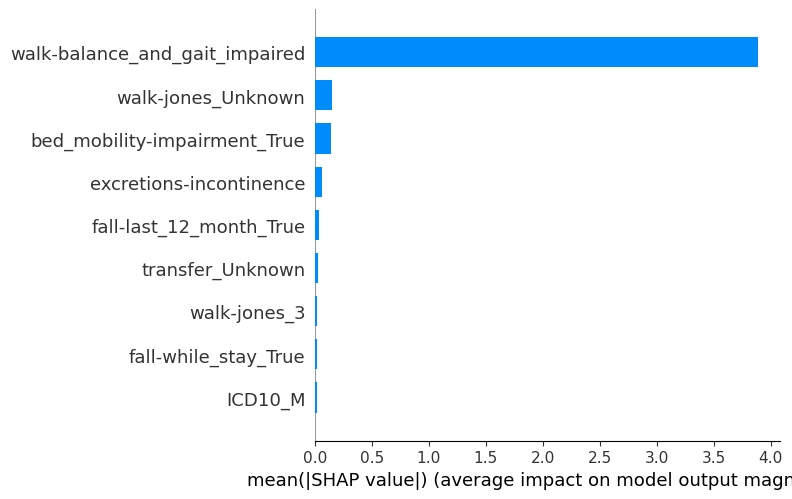

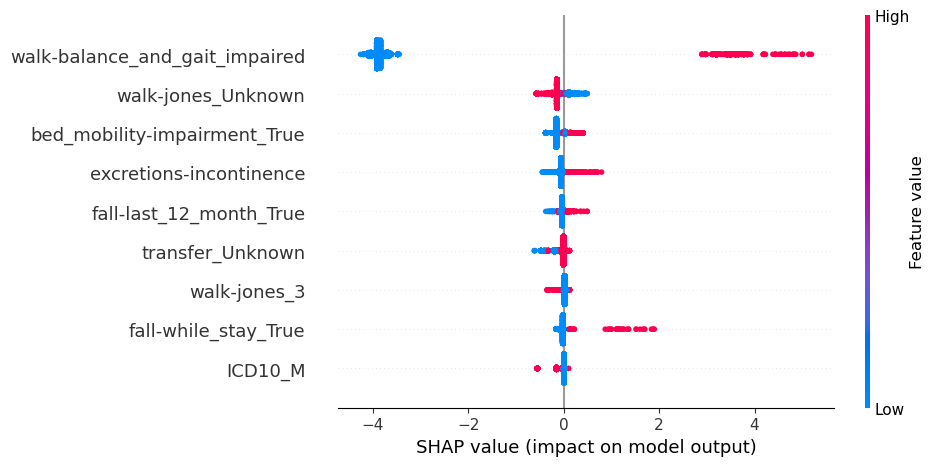

Shap Values for the test set


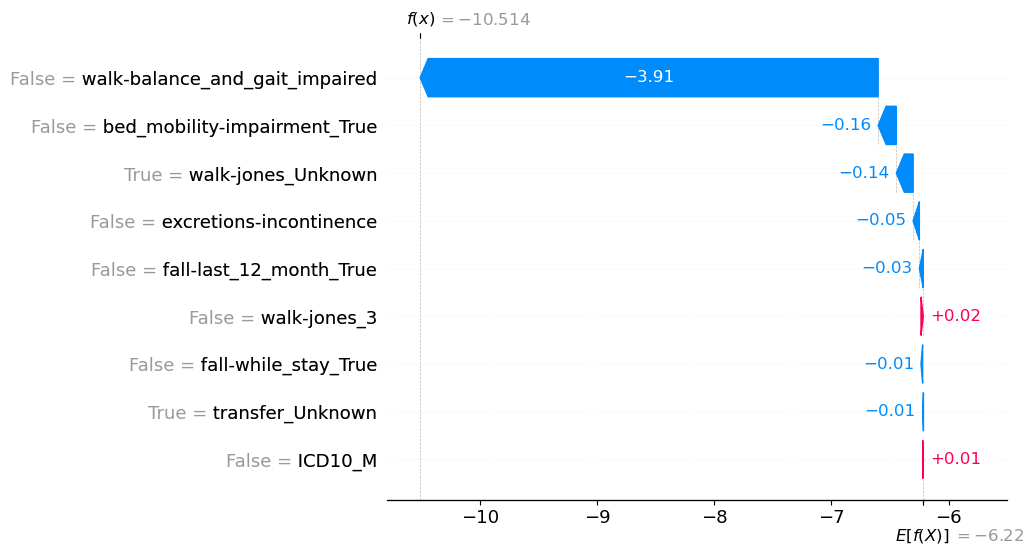

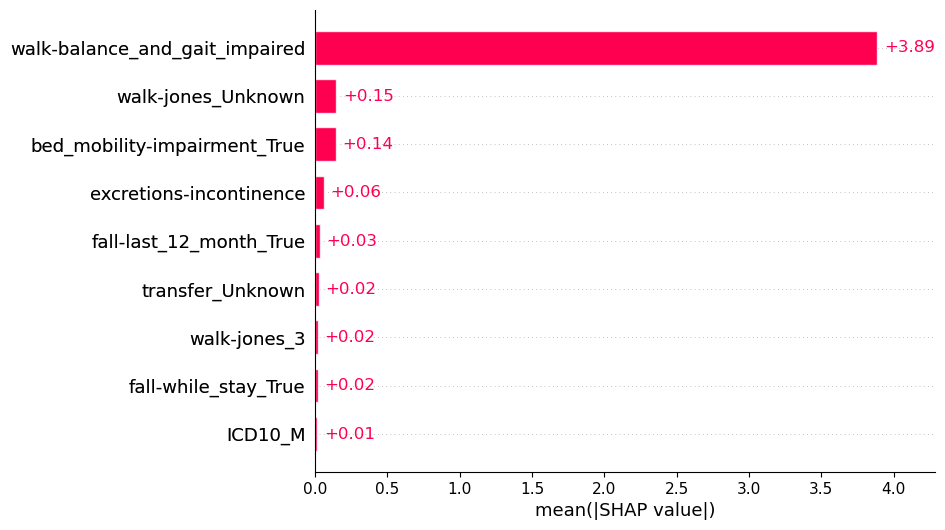

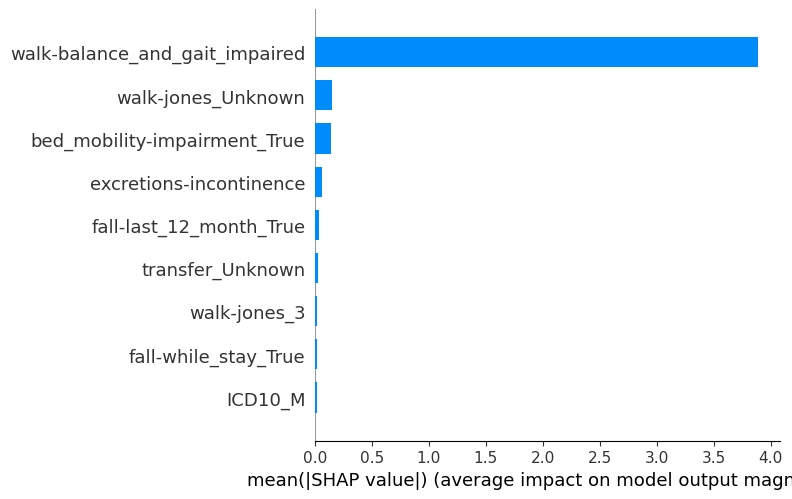

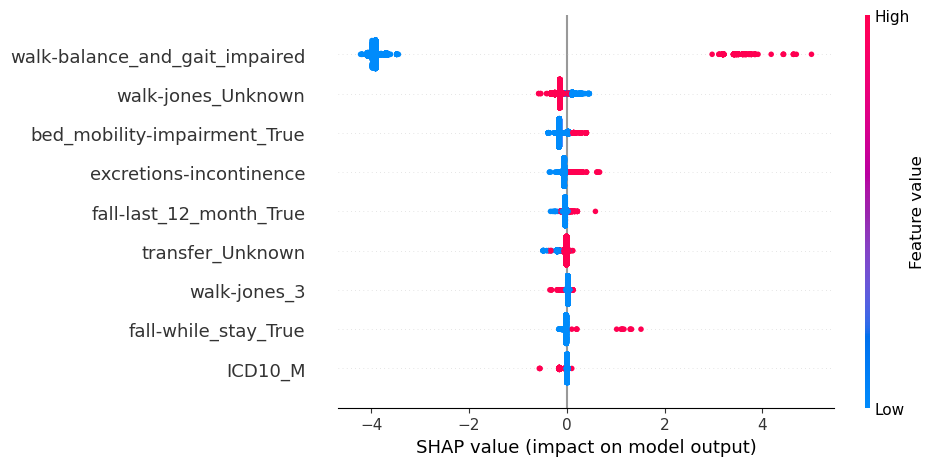

In [ ]:
xgb_m_pipeline(df1)

Interpretation:
The reduced XGBoost with only 10 variables achieved the best outcomes with a AUPRC of 0.28
The variable seems to hav an overwhelmingly large effect. As already seen further above, even though age was seen in the Boxplot to also have a strong effect on fallen. However the forward selection did not use it at all. A possible cause for this might be that age and walk and balance impaired are highly correlated aswell. Adding age when walk and balance is already in the dataset only introduces collinearity and noise. 

# Section 4

Strenghts and Weaknesses:

XGBoost is more complex and it is not as interpretable as the log. reg. 
Furthermore it is more complex and takes longer to compute. Especially in a real-time envirotnment like hospitals models should be runtime efficient,

Strenghts:
-better performance


RECALL!

Challange if integrated:
- if the model is implemented Nachvollziehbarkeit aus ethischen Gründen
- possible high risk fall patient receives counter-measures or medications that he does not need
- at the same time it would be fatal to not realize a patient is it a high risk of falling
- rechtliche Challanges (who is accountable machine or doctor in case somthing foes wrong)
- patient/doctor relationships might be harmed 

Actionable not obvious during data exploration:
- that walk and balance impaired captures almost all the variance
- the fact that the second most important variable is an Unknown variable shows that NaNs are missing at random, i.e. there is predictive power in missingness